In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
for dirname, _,filenames in os.walk("/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST"):
  for filename in filenames:
    print(os.path.join(dirname,filename))

/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/american_sign_language.PNG
/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/amer_sign3.png
/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/amer_sign2.png
/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/sign_mnist_test.csv
/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/sign_mnist_train.csv
/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/sign_mnist_test/sign_mnist_test.csv
/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/sign_mnist_train/sign_mnist_train.csv


In [ ]:
#importing keras,tensorflow modules
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import tensorflow
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [ ]:
#loading datasets
train_df=pd.read_csv("/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/sign_mnist_train/sign_mnist_train.csv")
test_df=pd.read_csv("/content/drive/MyDrive/Sign_Language/Sign_Language_MNIST/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
test_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [ ]:
#preprocessing on train dataset
train_label=train_df["label"]
train_label.head()
trainset=train_df.drop(["label"],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
X_train= trainset.values
X_train=trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [ ]:
#preprocessing on test dataset
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
X_test.shape

(7172, 784)

In [ ]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
X_test= X_test.values.reshape(-1,28,28,1)

In [ ]:
#Converting Interger labels into binary form
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [ ]:
X_test=X_test/255

In [ ]:
train_label.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

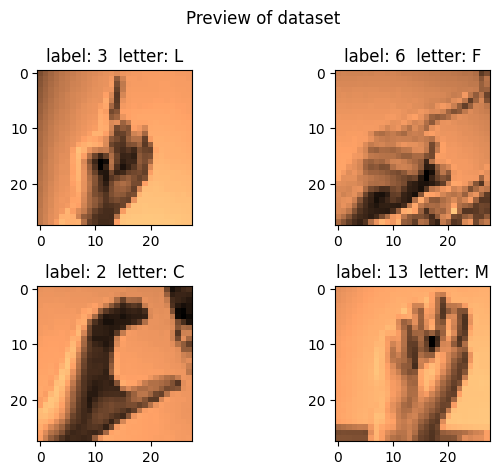

In [ ]:
#Visualizing Images from pixels of dataset
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='copper')
axe[0,0].set_title('label: 3  letter: L')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='copper')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='copper')
axe[1,0].set_title('label: 2  letter: C')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='copper')
axe[1,1].set_title('label: 13  letter: M')
plt.tight_layout()

Text(0.5, 1.0, 'Frequency of each label')

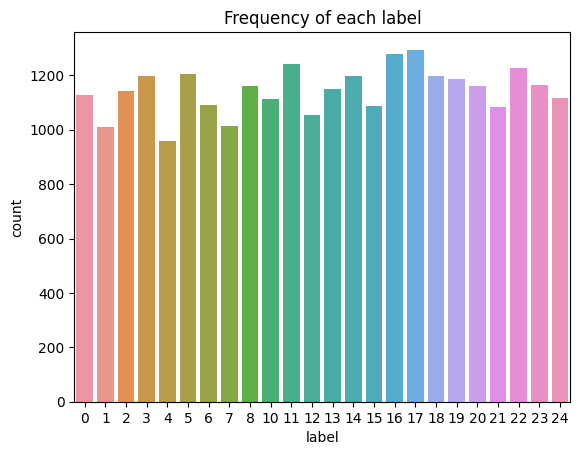

In [ ]:
#Frequency plot of the labels
sns.countplot(x=train_label)
plt.title("Frequency of each label")

In [ ]:
#CNN model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Reseting random seeds for reproducibility of model every time
np.random.seed(0)
tensorflow.random.set_seed(0)
#Training the model
model.fit(X_train,y_train,batch_size=200,
          epochs = 10,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/10
138/138 [==============================] - 7s 16ms/step - loss: 2.5636 - accuracy: 0.4673 - val_loss: 3.1500 - val_accuracy: 0.3200
Epoch 2/10
138/138 [==============================] - 2s 14ms/step - loss: 0.1022 - accuracy: 0.9762 - val_loss: 3.1165 - val_accuracy: 0.4569
Epoch 3/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0047 - accuracy: 0.9999 - val_loss: 3.1017 - val_accuracy: 0.6120
Epoch 4/10
138/138 [==============================] - 2s 13ms/step - loss: 9.9830e-04 - accuracy: 1.0000 - val_loss: 3.0949 - val_accuracy: 0.6283
Epoch 5/10
138/138 [==============================] - 2s 13ms/step - loss: 4.9852e-04 - accuracy: 1.0000 - val_loss: 3.0897 - val_accuracy: 0.6414
Epoch 6/10
138/138 [==============================] - 2s 13ms/step - loss: 3.1866e-04 - accuracy: 1.0000 - val_loss: 3.0848 - val_accuracy: 0.6793
Epoch 7/10
138/138 [==============================] - 2s 12ms/step - loss: 2.1157e-04 - accuracy: 1.0000 - val_loss: 3.0817 - val_

In [ ]:
#Evaluating the model
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 1s 4ms/step - loss: 3.0726 - accuracy: 0.7192


In [ ]:
#accuracy
print('Model accuracy on test data = {}%'.format(acc*100))

Model accuracy on test data = 71.91857099533081%


In [ ]:
#testing the sign language images predicted wrt given sentences
'''Random images are taken from X_test along with the corresponding labels in y_test
     based on the letters in the sentence.
     Now we feed these images to the model and its output will be printed'''
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    sentence = sentence.lower()
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '

    images_taken = []
    result = ''
    X_test_reshape = tensorflow.reshape(X_test, [-1, 28, 28, 1])
    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tensorflow.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')

    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 30ms/step
The actual sentence is "sign language"
The predicted sentence is "sigd language"


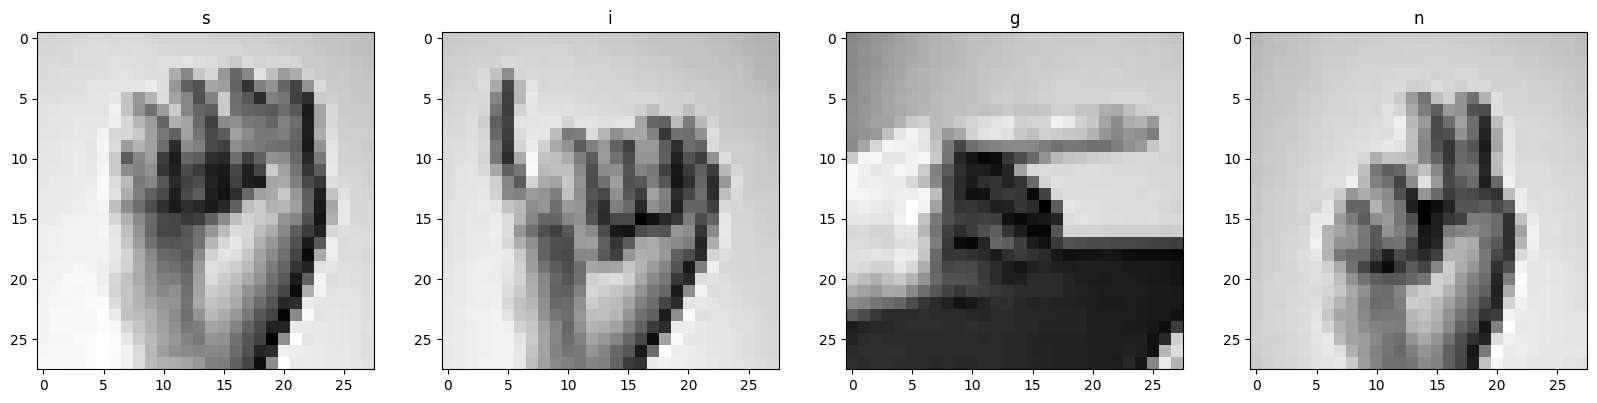

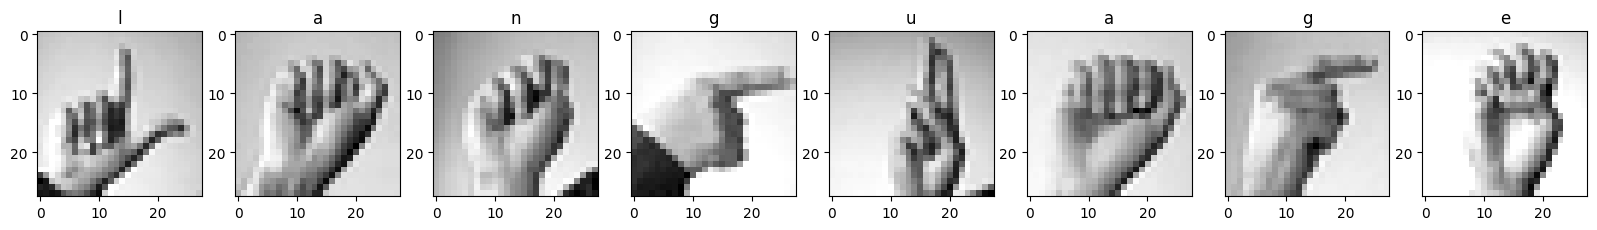

In [ ]:
#visualising the predicted word wrt to sign language using given word
test_on_sentence(model, 'sign language', test_df.drop('label', axis=1), test_df['label'], lb)

1/1 [==============================] - 0s 23ms/step
The actual sentence is "what is the time"
The predicted sentence is "wgah is xhe time"


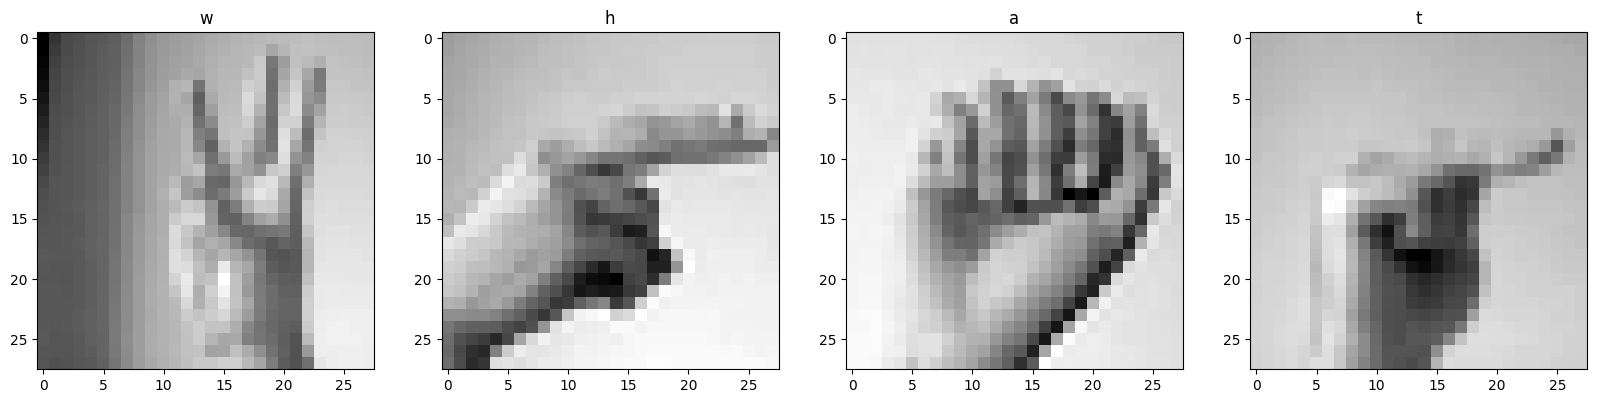

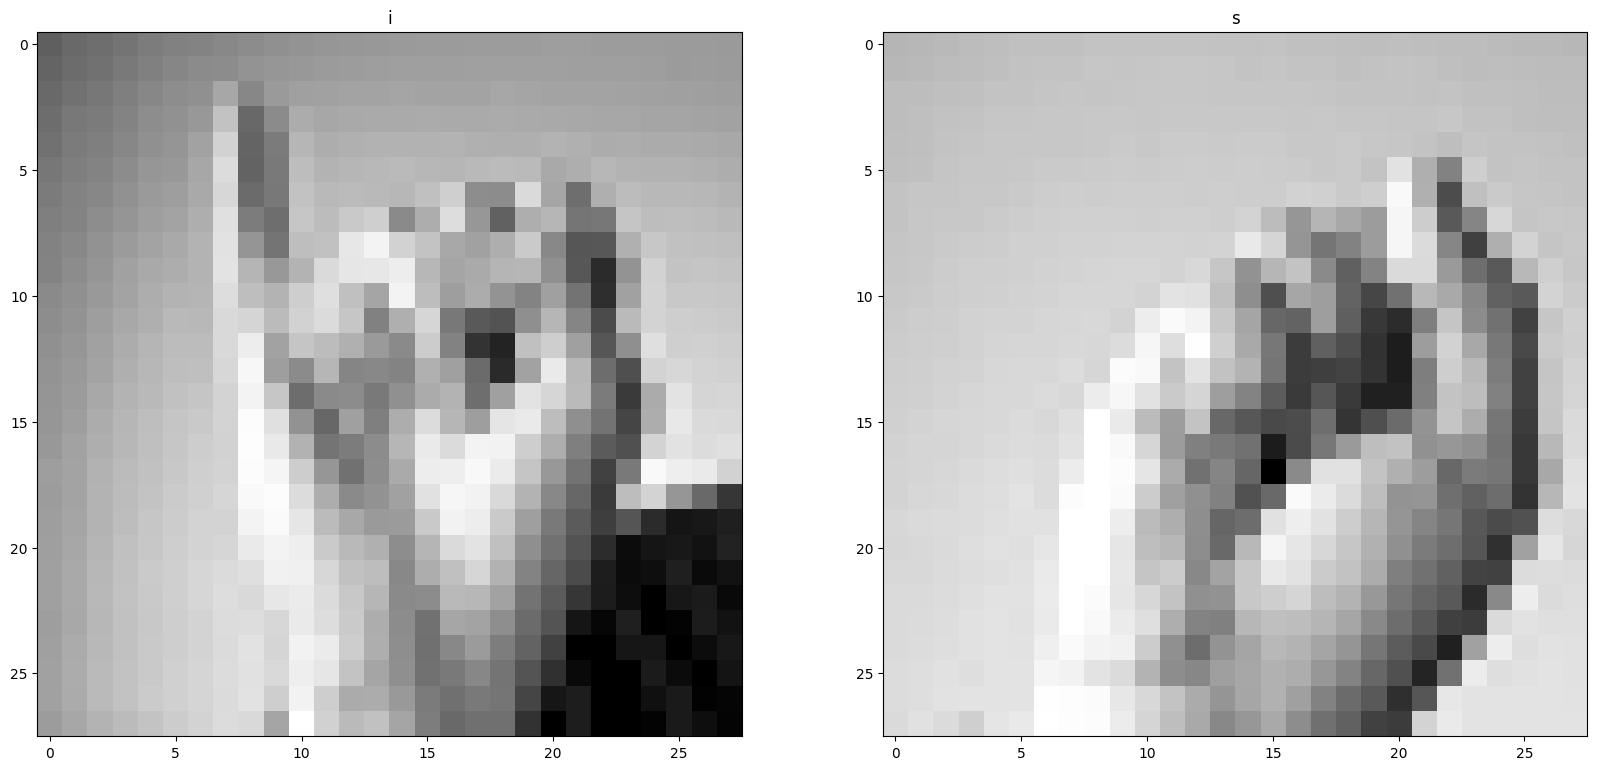

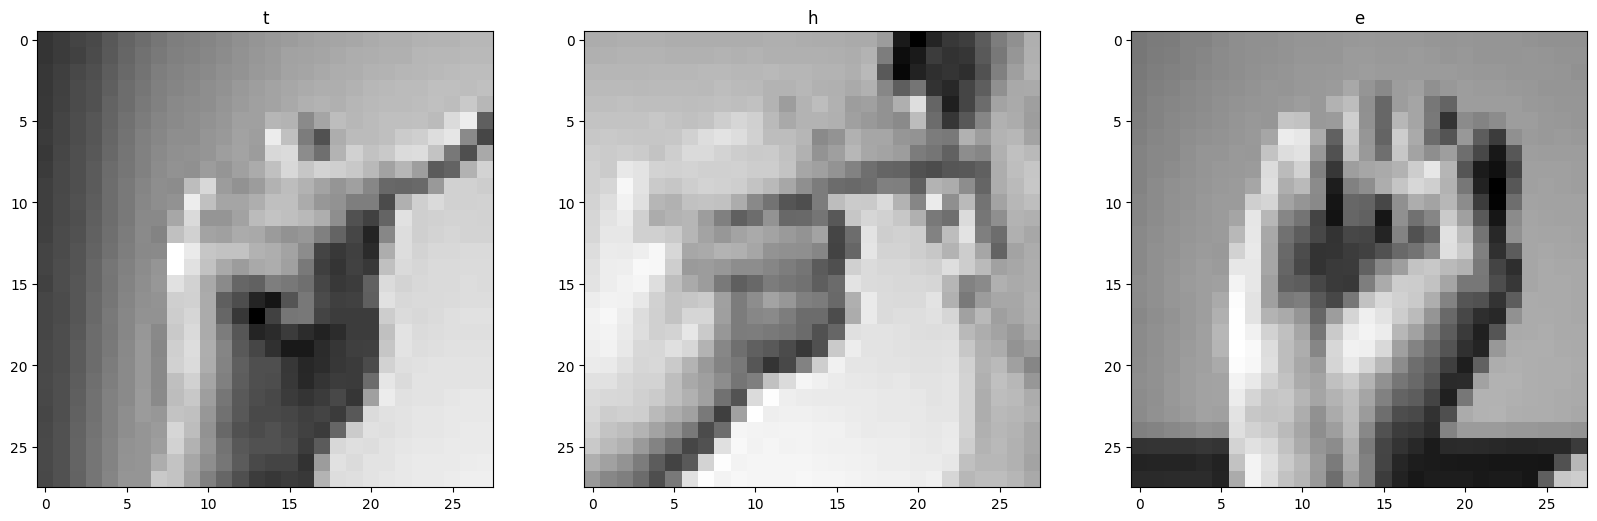

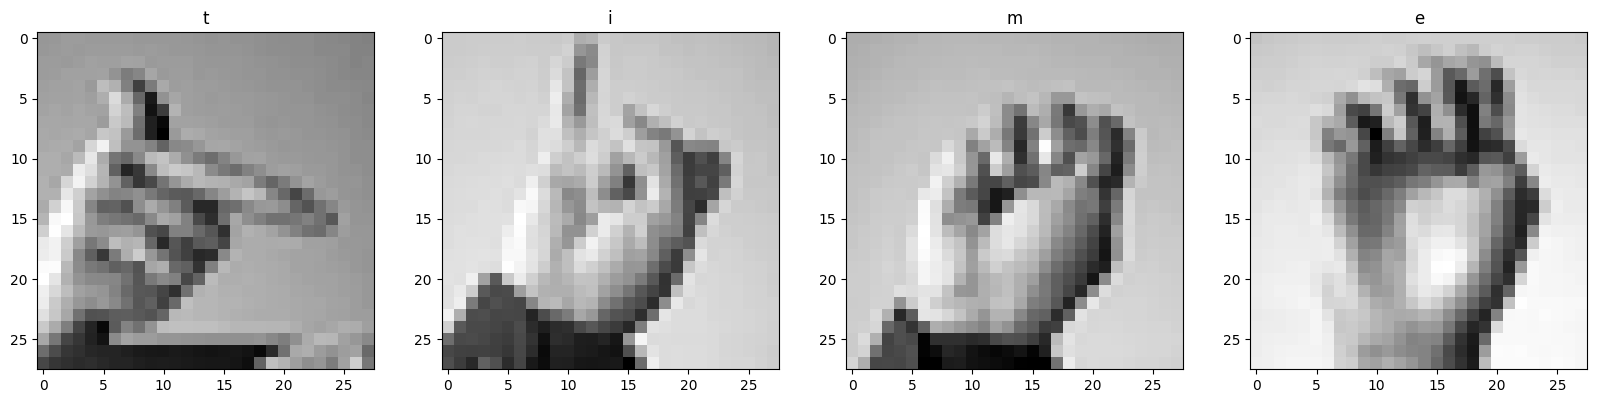

In [ ]:
test_on_sentence(model, 'what is the time', test_df.drop('label', axis=1), test_df['label'], lb)

1/1 [==============================] - 0s 18ms/step
The actual sentence is "chaithanya krishna"
The predicted sentence is "cgaixhanya krishna"


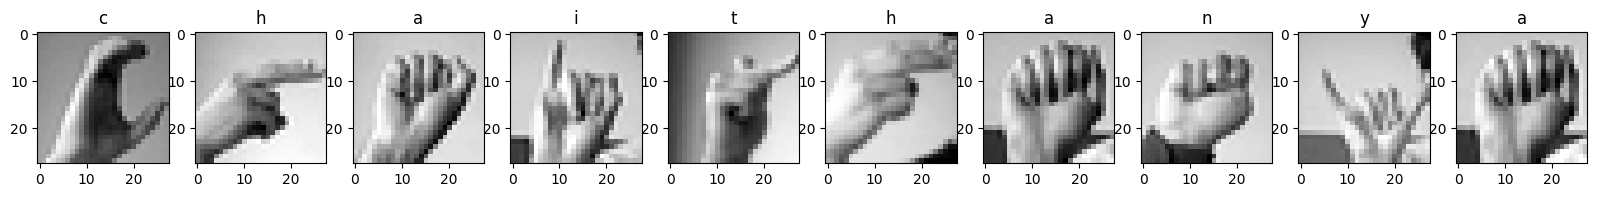

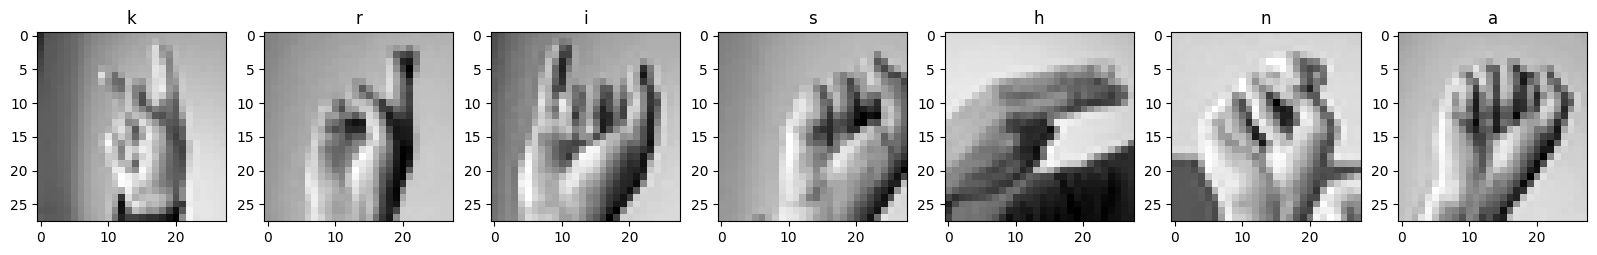

In [ ]:
test_on_sentence(model, 'Chaithanya Krishna', test_df.drop('label', axis=1), test_df['label'], lb)

In [ ]:
#evaluation of misclassifications
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels:")
print(predicted_labels)
#------------------------
true_labels = np.argmax(y_test, axis=1)
print("\nTrue Labels:")
print(true_labels)

225/225 [==============================] - 1s 2ms/step
Predicted Labels:
[6 5 9 ... 2 4 2]

True Labels:
[6 5 9 ... 2 4 2]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true_labels, predicted_labels)

array([[327,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0, 366,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  14,   0,   0,   0,   0,  48,   0,   4,   0,   0],
       [  0,   2, 246,   0,   0,   1,   0,  21,   0,   0,   0,   6,   0,
         10,   0,   0,   0,   0,   0,   0,   0,  24,   0,   0],
       [  0,   0,   0,  80,   0,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  40,   0,   0, 123,   0,   0,   0,   0],
       [  0,  68,   0,   0, 364,   1,   0,   0,   0,   0,   0,   0,   1,
         18,   4,   5,   0,   0,   0,  21,   0,  16,   0,   0],
       [  0,   0,   0,   0,   0, 213,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,  33,   0,   0],
       [  0,   0,   0,   0,   0,   0, 340,   0,   0,   0,   0,   0,   0,
          0,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  93

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       331
           1       0.83      0.85      0.84       432
           2       1.00      0.79      0.88       310
           3       0.85      0.33      0.47       245
           4       1.00      0.73      0.84       498
           5       0.98      0.86      0.92       247
           6       0.64      0.98      0.77       348
           7       0.94      0.79      0.86       436
           8       0.86      0.53      0.66       288
           9       0.82      0.65      0.72       331
          10       1.00      0.92      0.96       209
          11       0.88      0.73      0.80       394
          12       0.89      0.68      0.77       291
          13       0.86      0.76      0.80       246
          14       0.41      1.00      0.59       347
          15       0.77      1.00      0.87       164
          16       0.70      0.65      0.67       144
   

In [ ]:
# Identify and print misclassified data
misclassified_indices = np.where(predicted_labels != true_labels)[0]
misclassified_indices

array([   4,    5,    6, ..., 7160, 7162, 7167])

In [ ]:
misclassified_data = test_df.iloc[misclassified_indices]
misclassified_info=misclassified_data.drop(['label'],axis=1)
misclassified_info

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53
5,72,79,87,101,115,124,131,135,139,142,...,187,189,192,193,194,194,194,195,195,194
6,93,100,112,118,123,127,131,133,136,139,...,173,175,177,178,180,180,181,181,181,183
8,191,194,196,198,201,203,204,205,205,205,...,43,57,78,64,47,62,65,62,62,68
12,128,131,133,135,137,139,140,142,145,146,...,131,130,73,45,61,76,84,85,65,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,98,108,122,129,133,137,141,144,145,148,...,116,96,91,87,141,195,188,191,191,192
7159,168,170,170,170,170,171,171,171,171,171,...,55,54,51,47,42,40,29,27,25,28
7160,124,127,131,134,137,139,141,142,143,144,...,25,23,21,15,22,22,29,19,12,18
7162,130,131,131,134,133,135,137,136,136,137,...,128,106,107,63,11,147,194,182,176,124


In [ ]:
misclassified_label = test_label.iloc[misclassified_indices]
misclassified_label

4        3
5       21
6       10
8        3
12      21
        ..
7155    23
7159     3
7160    19
7162    10
7167     1
Name: label, Length: 2014, dtype: int64

In [ ]:
#data augmentation by Normalizing Image dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
#Retraining the model
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
          epochs = 10,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/10
138/138 [==============================] - 13s 85ms/step - loss: 2.6737 - accuracy: 0.2078 - val_loss: 1.4139 - val_accuracy: 0.5936
Epoch 2/10
138/138 [==============================] - 12s 88ms/step - loss: 1.6207 - accuracy: 0.4777 - val_loss: 1.1009 - val_accuracy: 0.6414
Epoch 3/10
138/138 [==============================] - 12s 86ms/step - loss: 1.0915 - accuracy: 0.6447 - val_loss: 0.6310 - val_accuracy: 0.7711
Epoch 4/10
138/138 [==============================] - 12s 86ms/step - loss: 0.8256 - accuracy: 0.7276 - val_loss: 0.4461 - val_accuracy: 0.8473
Epoch 5/10
138/138 [==============================] - 10s 73ms/step - loss: 0.6676 - accuracy: 0.7821 - val_loss: 0.4648 - val_accuracy: 0.8259
Epoch 6/10
138/138 [==============================] - 12s 87ms/step - loss: 0.5531 - accuracy: 0.8180 - val_loss: 0.2951 - val_accuracy: 0.8997
Epoch 7/10
138/138 [==============================] - 12s 84ms/step - loss: 0.4419 - accuracy: 0.8549 - val_loss: 0.2629 - val_accuracy:

In [ ]:
#Evaluating the final model
(ls,acc)=model.evaluate(x=X_test,y=y_test)
print('Model accuracy on normalized test data = {}%'.format(acc*100))

225/225 [==============================] - 1s 4ms/step - loss: 0.1660 - accuracy: 0.9499
Model accuracy on normalized test data = 94.99441981315613%


1/1 [==============================] - 0s 18ms/step
The actual sentence is "sign language"
The predicted sentence is "sign languags"


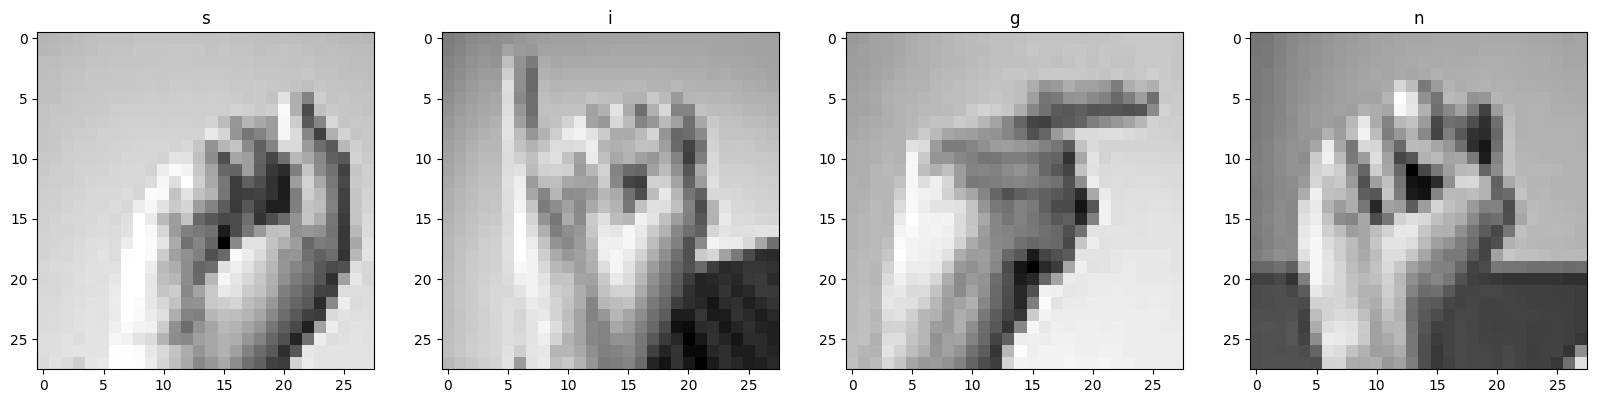

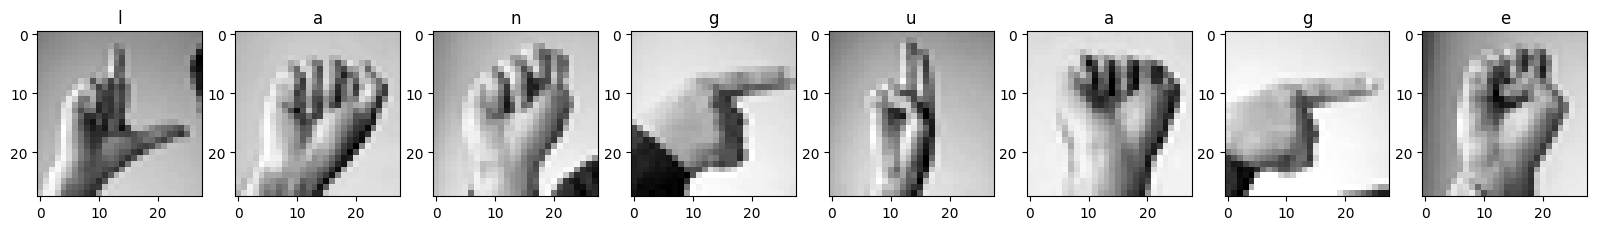

In [ ]:
#visualising the predicted word wrt to sign language using given word
test_on_sentence(model, 'sign language', test_df.drop('label', axis=1), test_df['label'], lb)

1/1 [==============================] - 0s 18ms/step
The actual sentence is "what is the time"
The predicted sentence is "whag is the fine"


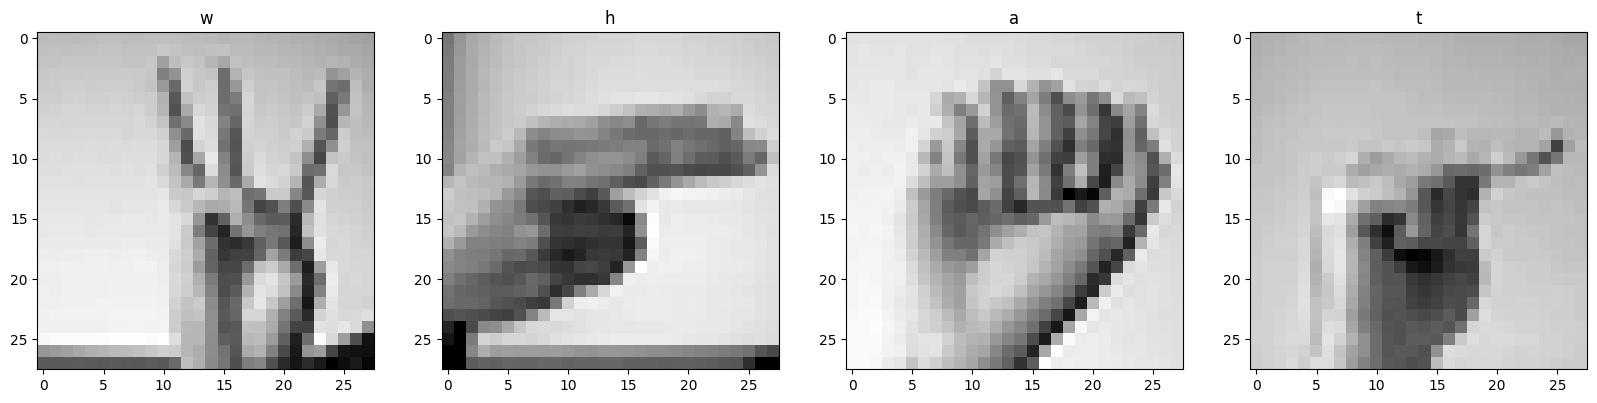

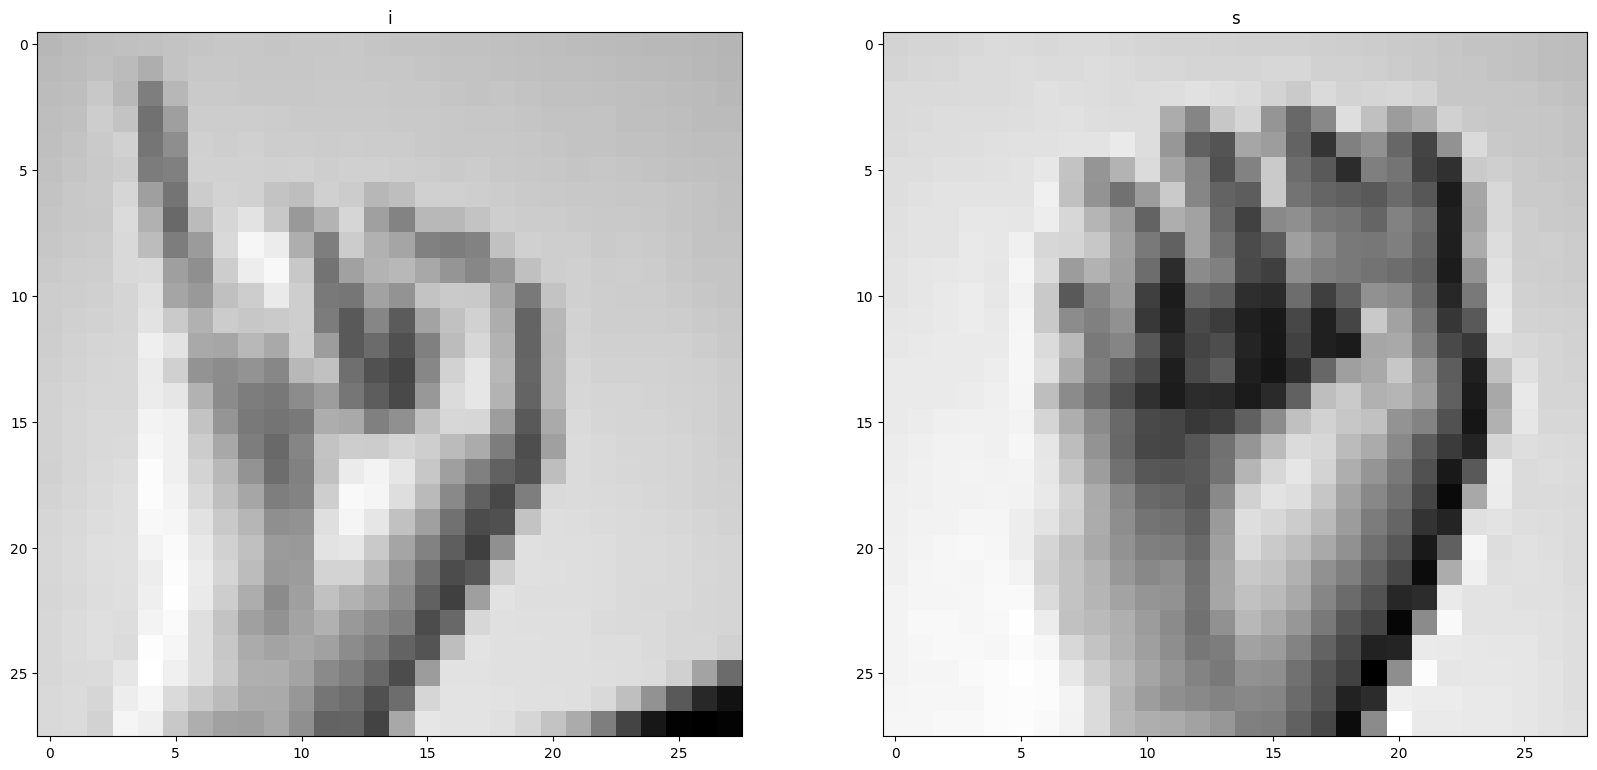

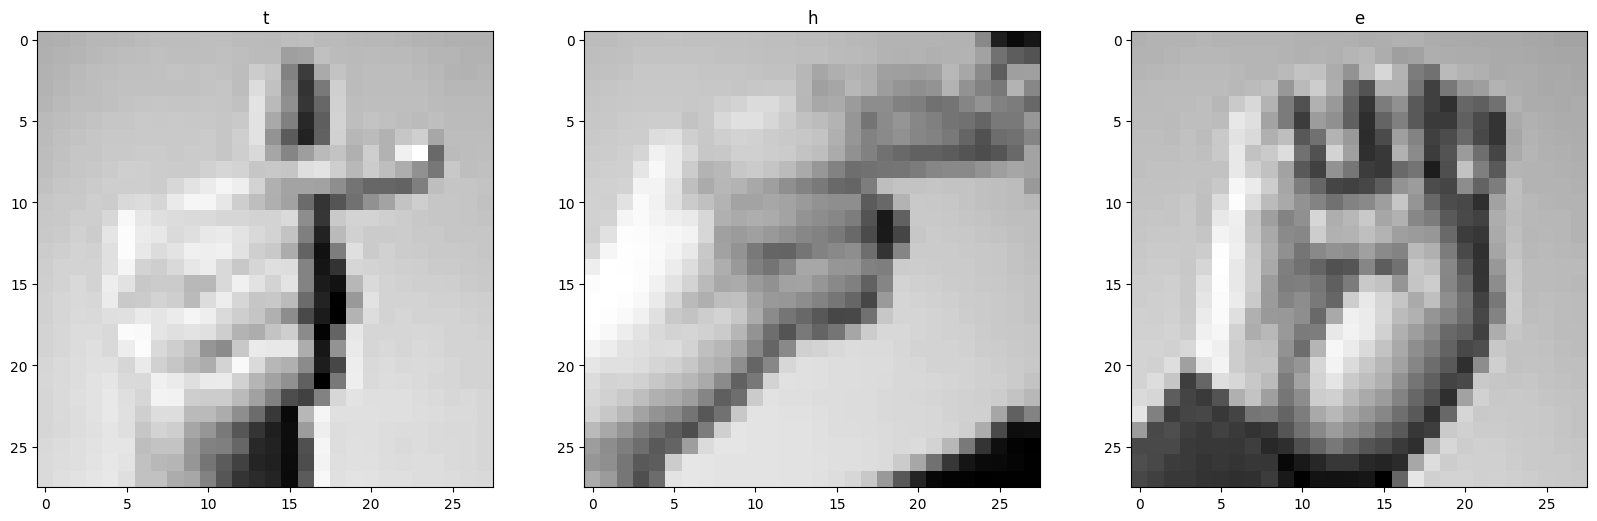

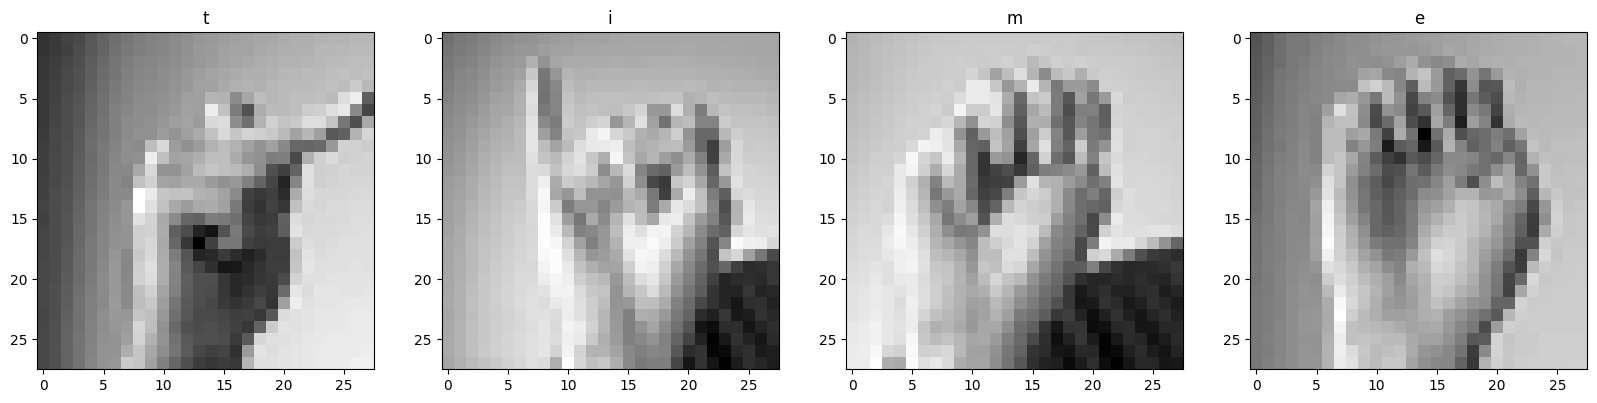

In [ ]:
test_on_sentence(model, 'what is the time', test_df.drop('label', axis=1), test_df['label'], lb)

1/1 [==============================] - 0s 37ms/step
The actual sentence is "chaithanya krishna"
The predicted sentence is "chaithanya krishna"


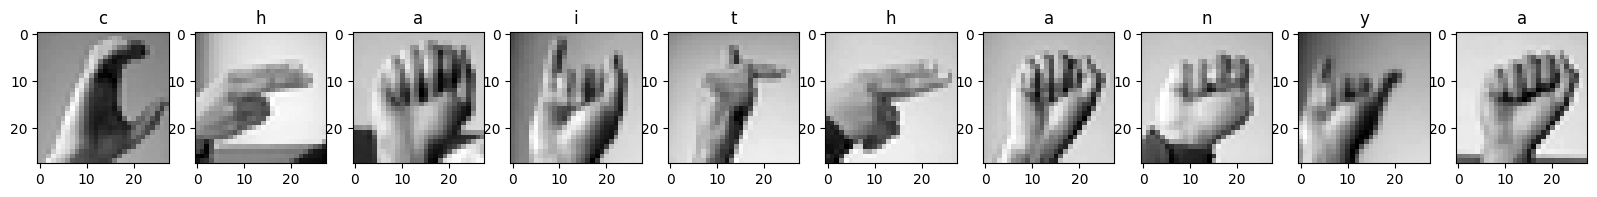

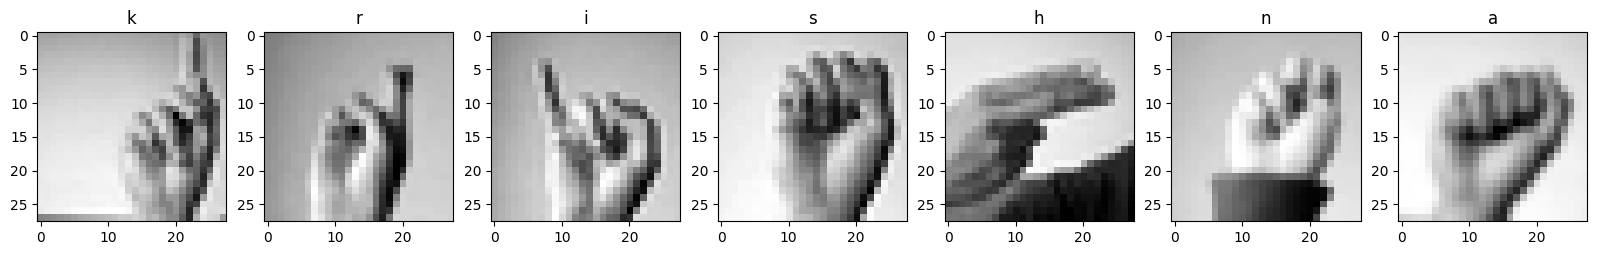

In [ ]:
test_on_sentence(model, 'Chaithanya Krishna', test_df.drop('label', axis=1), test_df['label'], lb)

In [ ]:
#logic behind hand sign visualizations:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [ ]:
sentence = 'sign language'
for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [ ]:
model.predict(tensorflow.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 132ms/step


array([[1.8888000e-09, 2.1968609e-11, 6.8076747e-06, 5.8040932e-09,
        7.0185642e-08, 3.5361009e-07, 9.1900915e-01, 7.7435538e-02,
        1.6104201e-09, 2.6230611e-08, 5.5235486e-08, 6.0165817e-08,
        4.2235864e-09, 4.5289099e-07, 1.9920886e-05, 7.7319446e-06,
        1.5931699e-10, 1.9005850e-07, 3.5108258e-03, 2.5000568e-11,
        4.9275606e-13, 5.9709379e-14, 8.6953078e-06, 4.0847485e-09]],
      dtype=float32)

In [ ]:
images_taken = []
result = ''
for i in sentence:
    if i != ' ':
        char_index = np.random.choice(test_label[test_label==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = model.predict(tensorflow.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[lb.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 30ms/step
sign langkage


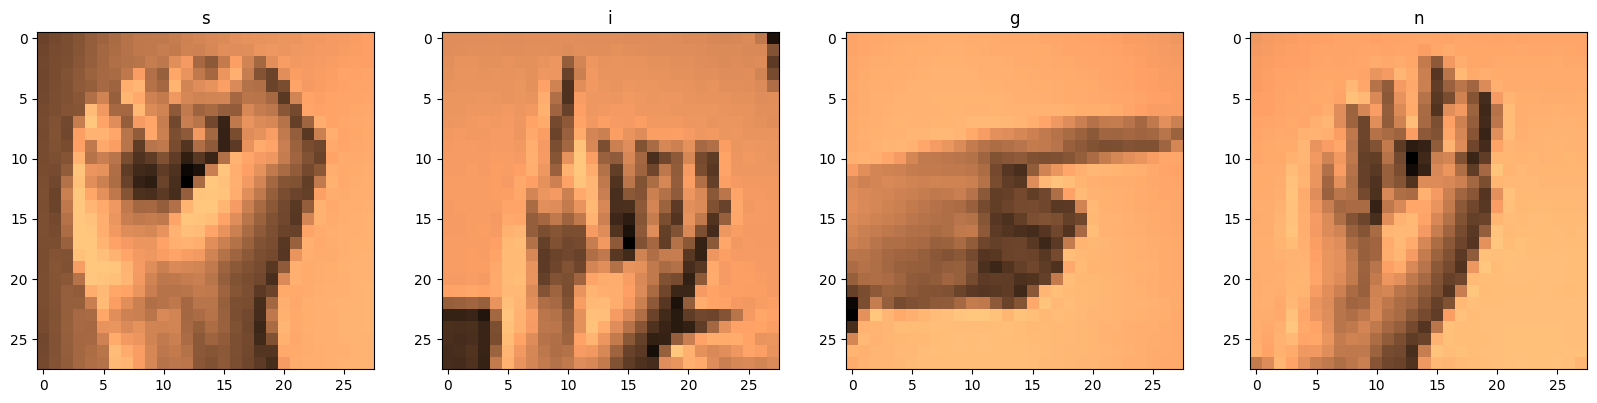

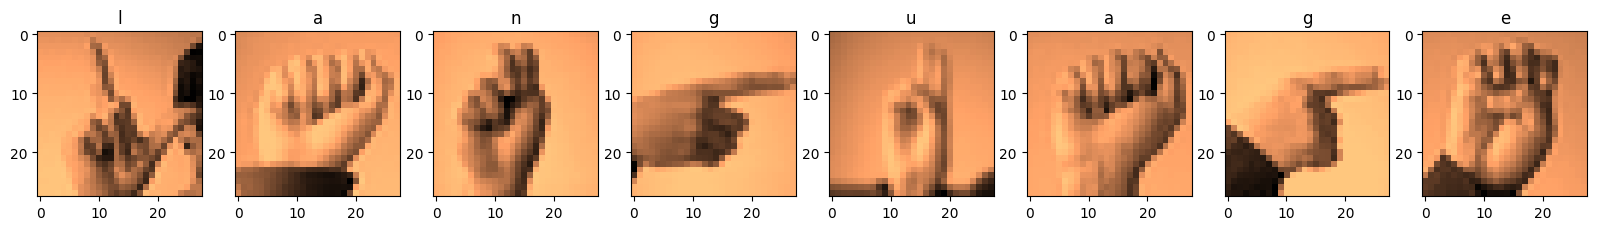

In [ ]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='copper')
        ax[i].set_title(word[i])